In [2]:
from keras.applications import VGG16
from keras import backend as K

In [4]:
model=VGG16(weights='imagenet',include_top=False)

In [6]:
layer_name='block3_conv1'
filter_index=0
layer_output=model.get_layer(layer_name).output
loss=K.mean(layer_output[:,:,:,filter_index])

In [7]:
grads=K.gradients(loss,model.input)[0]

In [8]:
grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)
iterate=K.function([model.input],[loss,grads])
import numpy as np
loss_value,grads_value=iterate([np.zeros((1,150,150,3))])

In [11]:
input_img_data=np.random.random((1,150,150,3))*20+128.
step=1.
for i in range(40):
    loss_value,grads_value=iterate([input_img_data])
    input_img_data+=grads_value*step

In [12]:
def deprocess_image(x):
    x-=x.mean()
    x/=(x.std()+1e-5)
    x*=0.1
    x+=0.5
    x=np.clip(x,0,1)
    x*=255
    x=np.clip(x,0,255).astype('uint8')
    return x

In [14]:
def generate_pattern(layer_name,filter_index,size=150):
    layer_output=model.get_layer(layer_name).output
    loss=K.mean(layer_output[:,:,:,filter_index])
    grads=K.gradients(loss,model.input)[0]
    grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)
    iterate=K.function([model.input],[loss,grads])
    input_img_data=np.random.random((1,size,size,3))*20+128.
    step=1.
    for i in range(40):
        loss_value,grads_value=iterate([input_img_data])
        input_img_data+=grads_value*step
    img=input_img_data[0]
    return deprocess_image(img)

In [16]:
import matplotlib.pyplot as plt

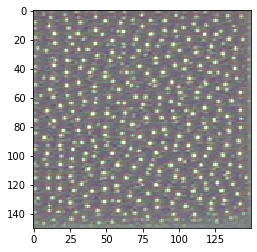

In [17]:
plt.imshow(generate_pattern('block3_conv1',0))

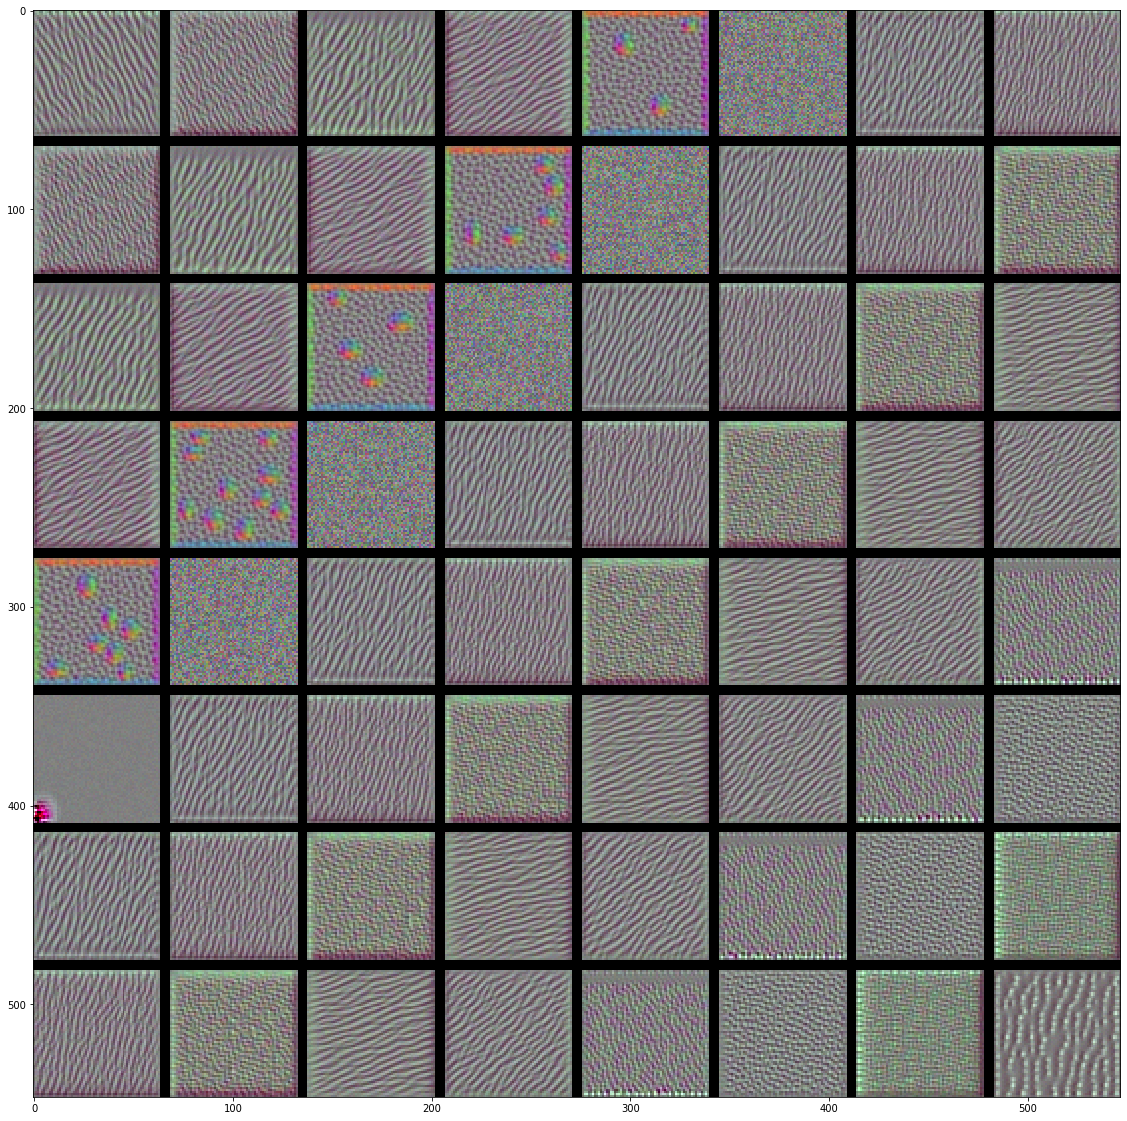

In [21]:
layer_name='block2_conv1'
size=64
margin=5
results=np.zeros((8*size+7*margin,8*size+7*margin,3),dtype='uint8')
for i in range(8):
    for j in range(8):
        filter_img=generate_pattern(layer_name,i+(j+8),size=size)
        horizontal_start=i*size+i*margin
        horizontal_end=horizontal_start+size
        vertical_start=j*size+j*margin
        vertical_end=vertical_start+size
        results[horizontal_start:horizontal_end,vertical_start:vertical_end,:]=filter_img
plt.figure(figsize=(20,20))
plt.imshow(results)